# Lecture 3 - 

``` python
experiment = mlflow.set_experiment(experiment_name="/Shared/marvel-demo")
mlflow.set_experiment_tags({
    "repository_name": "marvelousmlops/marvel-characters"
})
```

### Why This is Important
Organization:
* Groups related runs together
* Provides structure for ML experiments
* Makes it easy to find and compare runs
Tracking:
* All runs within this experiment will be grouped
* Helps track model versions
* Enables comparison of different approaches
Collaboration:
* /Shared/ path makes experiment visible to team
* Tags help others understand experiment context
* Links experiment to source code
Viewing Results
* In Databricks UI: Navigate to "Experiments" → "/Shared/marvel-demo"
* Via MLflow API: Use mlflow.get_experiment() with experiment ID
* Tags can be used for filtering and search

# Lecture 4 - MLflow Model Registration Pipelines

### The Basic Model: The "Engine"
* **What it is:** The `marvel_character_model_basic` is the pure, raw machine learning model.
* **Its Job:** Its only responsibility is the core mathematical task. It takes in properly formatted numerical data and outputs a prediction, in this case, a `1` or a `0`. It knows nothing about what those numbers mean in the real world.
* **Analogy:** It is the powerful engine of a car. It's highly optimized for one thing: producing power.

### The `pyfunc` Wrapper: The "Finished Car"
* **What it is:** The `marvel_character_model_custom` is the user-friendly, production-ready package built around the engine.
* **Its Job:** It handles all the "additional functions" needed to make the model useful and reliable in a real application. This includes:
    * **Post-processing:** Your example is perfect. It takes the engine's raw output (`1`) and translates it into a meaningful, human-readable format (`"alive"`).
    * **Pre-processing (Optional):** It could also be used to take user-friendly input (e.g., the name of a character) and convert it into the numerical format the engine needs (e.g., by fetching features from a feature store).
    * **Standardization:** It provides a single, consistent `predict()` method, regardless of what kind of engine is inside.


## More Details 

This document outlines two primary approaches for registering machine learning models using MLflow: Direct Framework Logging and using a Custom pyfunc Wrapper. Each method serves different purposes and is suited for different stages of the MLOps lifecycle.

## Pipeline 1: Direct Framework Logging
This is the most straightforward and common method for saving a model to MLflow. It involves using the specific MLflow module for the framework you are using (e.g., mlflow.sklearn, mlflow.pytorch) to log the model directly after training.

### Core Concept
The main idea is to quickly save the trained model object and its associated metadata in a way that MLflow understands natively. It's a one-step process that bridges model training and model tracking.

### Benefits
Simplicity and Speed: This method is extremely easy to implement, often requiring just a single line of code. It is the fastest way to get a model into the registry, making it perfect for rapid iteration and experimentation.

Full Model Access: When the model is loaded back, you receive the original, native model object. This means you can access all of its specific methods and attributes, such as predict_proba() or feature_importances_ in a scikit-learn model.

### When to Use This Approach
This approach is best suited for the early stages of a project or for less complex, internal-facing applications.

Development and Experimentation: Ideal for data scientists who are training and comparing many different models and need to track their results quickly.

Analysis and Internal Use: Perfect for situations where the end-user understands the model's framework and may need to perform deeper analysis using the model's native functions.

Simple Models: Best for models that do not require any custom logic (like pre-processing or post-processing) to be applied during inference.

## Pipeline 2: Custom pyfunc Wrapper
This is a more advanced and robust method where you wrap your trained model inside a custom Python class that inherits from mlflow.pyfunc.PythonModel. This wrapper class defines how the model should load and how it should make predictions.

### Core Concept
The main idea is to create a self-contained, standardized prediction artifact. The wrapper encapsulates not just the model, but also any business logic, data transformation steps, and dependencies required for it to function as an end-to-end prediction service.

### Benefits
Standardized Interface: Every model saved this way has a consistent predict() method, regardless of the underlying framework (scikit-learn, PyTorch, TensorFlow, etc.). This simplifies production deployment, as the serving infrastructure only needs to know how to interact with this standard interface.

Encapsulation of Custom Logic: It allows you to bundle any necessary pre-processing (e.g., fetching data from an API) or post-processing (e.g., converting prediction outputs to human-readable labels) directly with the model.

Robust Dependency Management: This approach provides a formal way to package custom code and dependencies. This ensures the model is truly portable and will execute correctly in any environment, from a local machine to a production Kubernetes cluster.

### When to Use This Approach
This approach is considered the best practice for any model that is intended for a production environment.

Production Deployment: It is the ideal method for preparing a model for deployment as a REST API or in a batch scoring job.

Team Collaboration: When a model will be used by other teams or services, the wrapper provides a clean, predictable API and hides the internal complexity of the model.

Complex Models: Essential for any model that requires data transformation, feature lookups, or output formatting as part of its prediction process.

# Some Important Jargons to quickly remember Terms. 

## 1️⃣ **Model Artifacts**  
👉 *“The physical files that make up your model.”*  

- These are the **outputs of training**, saved on disk (or DBFS/S3/ADLS).  
- Could include:  
  - The serialized model file (e.g., `model.pkl`, `model.pt`, `xgboost.json`)  
  - MLflow metadata (`MLmodel`, `conda.yaml`, `requirements.txt`)  
  - Any plots (confusion matrix, ROC curve) or supporting files  

💡 **Instant recall:**  
Artifacts = **the actual stuff 📦** (files, weights, configs) that MLflow saves for your run.  

---

## 2️⃣ **Experiment Run**  
👉 *“A single attempt to train/evaluate a model.”*  
- Logged in the **Experiments tab**.  
- Contains: params, metrics, artifacts, tags.  
- Identified by a unique `run_id`.  

💡 **Recall it as:** a **lab notebook entry 🧪** → “Here’s everything from this one run.”  

---

## 3️⃣ **Model Registry**  
👉 *“The library/catalog where finalized models live, versioned and ready to deploy.”*  

- A centralized **catalog of models**.  
- Features:  
  - Named models (`fraud_detection_model`)  
  - Automatic versions (v1, v2, v3…)  
  - Stage transitions (`Staging`, `Production`, `Archived`)  
  - Aliases (“latest-model”)  

💡 **Instant recall:**  
Registry = the **official company library 📚** where models graduate from experiments → production assets.  

---

## 4️⃣ **Logged Model**  
👉 *“The record of your model saved inside a run.”*  

- When you call `mlflow.sklearn.log_model(...)`:  
  - Saves your sklearn pipeline to artifacts under `runs:/<run_id>`  
  - That’s now a **logged model**.  

💡 Think: “It’s saved under a run notebook entry, but not yet in the official library.”  

---

## 5️⃣ **Registered Model**  
👉 *“A model promoted from just an artifact → an official version in the registry.”*  

- Comes with governance:  
  - Versions  
  - Aliases  
  - Stages  
- Loaded with:  
  ```python
  mlflow.sklearn.load_model("models:/fraud_detection_model/3")  
  mlflow.sklearn.load_model("models:/fraud_detection_model@production")
  ```

## 1️⃣ What is **Unity Catalog (UC)?**
- Unity Catalog is **Databricks’ governance and catalog layer**.  
- Think of it as the big **“organization-wide library of data & models.”**
- Inside Unity Catalog you can have:
  - **Tables** → datasets (Delta tables, structured SQL tables).
  - **Models** → machine learning models registered in MLflow.
  - **Functions, Volumes, etc.**  
- It provides **centralized permissions, versioning, governance**.  
  - Example: who can read this dataset, who can use this model, which version is “production”?

💡 **Recall:** UC = *central company library with shelves for both data and models.*

---

## 2️⃣ What are you seeing in your screenshot?
```
mlops_dev.marvel_characters.Models
   ├── marvel_character_model_basic
   └── marvel_character_model_custom
```

- You are inside the **`mlops_dev` catalog**, schema = `marvel_characters`, section = `Models`.  
- `marvel_character_model_basic` = Registered Model name for your raw LightGBM sklearn pipeline.  
- `marvel_character_model_custom` = Registered Model name for the PyFunc-wrapped version.  
- Each of those entries holds **versions**, for example:
  - `marvel_character_model_basic v1`, `v2`, ...
  - `marvel_character_model_custom v1`, `v2`, ...  

So the names represent the “folders” (Registered Model Names). Inside them, you’ll find versions.

---

## 3️⃣ Where do experiments fit in?
- **Experiments** = are **separate** from UC. They live in MLflow tracking.  
- Every time you run `basic_model.log_model()` or `wrapper.log_register_model()`, it:
  - Creates a new *Experiment Run* (with parameters, metrics, artifacts, confusion matrix plots, etc.).  
  - Those runs are visible in the **Experiments tab**, NOT in UC.  

⚠️ Important:  
- Experiments are for **tracking training history.**  
- Registered models in UC are for **managing production-ready model assets.**

---

## 4️⃣ Your exact scenario
You register a model like `marvel_character_model_custom`.  

👉 Now if you run 4–5 more experiments of the same “custom model flow”:  
- Each run → shows up as a new experiment run (`Run-2024-05-02`, `Run-2024-05-03`, etc.). ✅  
- Each time you **register the resulting model** to `marvel_character_model_custom`, it **creates a new version of that model inside the same UC entry.**  

For example:
```
marvel_character_model_custom
   v1 (alias: latest-model)
   v2 (alias: latest-model, Staging)
   v3
```

---

## 5️⃣ Answering your question directly
> "it means in the dev environment, under model these are the experiments that I ran?"

❌ Not exactly.  
- What you see in UC → are **Registered Model Names** (`marvel_character_model_basic`, `marvel_character_model_custom`).  
- Inside each → you have **model versions** (v1, v2, etc.), registered from experiment runs.  
- The **experiments themselves** are tracked elsewhere (MLflow "Experiments" dashboard).  

---

> "for model_custom I want to run 4,5 more different experiments and runs, it will not generate new instance in the UC, but only new versions, right?"

✅ Exactly.  
- UC will not create a brand new entry (because your code is registering them under the same name `marvel_character_model_custom`).  
- Instead, UC will keep adding new **versions under the same model entry**.  

So you’ll end up with:
```
marvel_character_model_custom
   Version 1 (from run1)
   Version 2 (from run2)
   Version 3 (from run3)
   Version 4 (from run4)
```

---

## 🎯 Cheat Sheet Mental Recall
- **Experiment Run** → temporary log of a training job (parameters, metrics, artifacts).  
- **Registered Model (UC)** → permanent named collection in Unity Catalog (like `marvel_character_model_custom`).  
- **Model Version** → numbered version (v1, v2, v3…) inside a registered model entry.  
- **Aliases (latest, staging, production)** → convenient labels pointing to specific versions.  


---

✅ **So: Experiments → produce runs. Runs → can be registered. If you keep registering under the same name, you don’t create new folders in UC, you create new versions inside the same model.**



# Complete Flow from Experiments to Model Registory.

All training runs during experimentation just live in MLflow **Experiments Tracking** (`/Shared/xyz_experiment`) with their own run IDs.  
Only when you **promote** them using `mlflow.register_model(...)` (or using the Databricks UI > “Register Model”) do they appear in UC as **Registered Models + Versions**.  

Let’s build a **detailed, story-style descriptive flow with names + versions** so you can picture it step by step.

---

# 🔎 Flow: From Experiment Run → UC Registered Versions

---

## 🧪 Step 1: Training, Experiment Runs (MLflow Experiments Tab)

Imagine you run an experiment called:  
`Experiment path: /Shared/marvel_experiment`

You train 3 times with different hyperparameters:

- **Run-2024-05-01** → Model trained with `learning_rate=0.1` → Accuracy = **0.88**  
- **Run-2024-05-02** → Model trained with `learning_rate=0.01` → Accuracy = **0.92 ✅ best**  
- **Run-2024-05-03** → Model trained with `learning_rate=0.001` → Accuracy = **0.85**

👉 At this stage:  
- All 3 runs exist in **Experiments Tab**.  
- Logged params, metrics, artifacts (model.pkl, confusion matrix, plots).  
- **Nothing is yet in Unity Catalog.**  

💡 Unsaved drafts in your lab notebook 🧪.

---

## 📦 Step 2: Register the Best Run

Now you decide → “Run-2024-05-02 is the best model.”  

You click “Register Model” (UI) or run code:  
```python
mlflow.register_model(
    model_uri="runs:/<run-id>/lightgbm-pipeline-model",
    name="mlops_dev.marvel_characters.marvel_character_model_basic"
)
```

UC now creates a **Registered Model Entry**:

```
marvel_character_model_basic
   v1 → from Run-2024-05-02
```

👉 This is your **first “official version”** of the model in UC.

💡 Published first edition of the book 📚.

---

## 📦 Step 3: Register Another Run → UC Creates New Version

Next, suppose later you rerun training with an updated dataset/params, new best run:

- **Run-2024-06-01** → Model trained with `max_depth=6` → Accuracy = **0.94**

You register this too under the SAME registered model name:  
```python
name="mlops_dev.marvel_characters.marvel_character_model_basic"
```

UC now appends it as **Version 2**:

```
marvel_character_model_basic
   v1 → from Run-2024-05-02 (acc = 0.92)
   v2 → from Run-2024-06-01 (acc = 0.94)
```

👉 Now UC shows both v1 and v2, with lineage back to their runs.

💡 A new edition of the same book.

---

## 📦 Step 4: Register Another Experiment → Add Version 3

- **Run-2024-06-15** → Model trained on new features → Accuracy = **0.91** (worse, but let’s register anyway)

UC now shows:

```
marvel_character_model_basic
   v1 → Run-2024-05-02 (0.92 acc)
   v2 → Run-2024-06-01 (0.94 acc ✅ best so far)
   v3 → Run-2024-06-15 (0.91 acc)
```

---

## 🏷️ Step 5: Assign Aliases & Stages

To make life easier:
```python
client.set_registered_model_alias(
   name="mlops_dev.marvel_characters.marvel_character_model_basic",
   alias="latest-model",
   version=2
)

client.transition_model_version_stage(
   name="mlops_dev.marvel_characters.marvel_character_model_basic",
   version=2,
   stage="Production"
)
```

Now UC shows:

```
marvel_character_model_basic
   v1 → (old candidate, archived)
   v2 → (Production ✅, @latest-model)
   v3 → (Staging, being tested)
```

👉 Aliases (`@latest-model`) and stages (`Production`, `Staging`) let teams decouple “which exact version” from “what environment.”

💡 Sticky notes on library copies: “This is the PRODUCTION edition” 🏷️.

---

# 🎯 TL;DR — Recall Flow
1. **Experiment runs** → temporary, one per training job. Held in Experiments tab.  
   - Run-2024-05-01 (acc=0.88)  
   - Run-2024-05-02 (acc=0.92) ✅  
   - Run-2024-05-03 (acc=0.85)  

2. **Register a run** → Creates/updates a **Registered Model** in UC.  
   - `marvel_character_model_basic` v1 → from Run-2024-05-02  

3. **Register more runs** → Adds **new versions** under the same model name.  
   - v2, v3… each tied to different runs.

4. **Aliases & stages** → Label specific versions for Production or Staging.  
   - v2 = Production & @latest-model  
   - v3 = Staging  

---

✅ So you are right:  
➡️ During training → only runs (not UC).  
➡️ Register → creates/update a model entry in UC.  
➡️ Register again → adds versions under the same model, **NOT** new UC entries.

---

👉 Analogy Summary:  
- **Run** = lab trial 🧪  
- **Registered model name in UC** = book title 📚  
- **Versions** = editions of that book (v1, v2, v3)  
- **Aliases/stages** = librarian sticky notes ("latest", "staging", "production").  

# What is Feature Serving?

**Feature serving is the process of retrieving pre-calculated feature data from a feature store for real-time use.** It's the "ingredient preparation" step.

In MLOps, when a prediction request comes in for a specific entity (like `user_id=123`), the feature serving system is responsible for looking up the latest, up-to-date features for that user (e.g., `user_123_purchase_count_7d = 5`) from the feature store and providing them with very low latency.



### What is Model Serving?

**Model serving is the process of deploying a trained machine learning model and making it available to make predictions, usually via an API endpoint.** It's the "final cooking" step.

The model serving system takes the features provided by the feature serving layer, feeds them into the model, executes the prediction logic, and returns the final result (e.g., `"Churn Risk: 0.85"`).



### How They Work Together

In a typical real-time ML system, these two processes happen sequentially:

1.  **Request:** A user's action on an app or website triggers a request to the model serving endpoint, providing a primary key (e.g., `user_id=123`).
2.  **Feature Serving:** The system immediately calls the feature serving layer to retrieve the latest features for `user_id=123`.
3.  **Model Serving:** The retrieved features are passed to the loaded model.
4.  **Prediction:** The model uses these features to calculate a prediction.
5.  **Response:** The final prediction is sent back to the user's application.

This entire process must happen in milliseconds.

# What is a Lakeflow job?

Lakeflow is Databricks’ workflow/orchestration framework (part of Databricks Workflows).

A Lakeflow job is a scheduled or triggered workflow that runs a sequence of tasks: data pipelines, feature engineering, retraining models, generating features/predictions, etc.

# Machine Learning Model Serving Architectures

These notes summarize the key concepts of batch and real-time model serving based on the Xebia blog post on ML serving architectures.
Link: https://xebia.com/blog/ml-serving-architectures/

## Batch Serving (Asynchronous Prediction)
Batch serving is an architecture where model predictions are calculated in advance, on a fixed schedule, and stored for later retrieval. It is the simplest form of model serving.

### Core Concept
The model runs periodically on a finite batch of data. The results (predictions) are then saved to a database or a key-value store. When a user needs a prediction, the application fetches the pre-computed result from this store instead of calling the model directly.

### Key Characteristics
Asynchronous: The prediction is made completely separately from the user's request. There is a delay, or "staleness," between when the prediction is calculated and when it is served.

High Throughput: Because predictions are done in bulk, this architecture can handle a very large volume of data efficiently.

Bounded Domain: It works best when you have a predictable and finite set of inputs to score (e.g., all your active users, all products in your catalog).

### When to Use It
When real-time freshness is not critical.

For applications like generating daily product recommendations for all users.

When the number of possible inputs is known and limited.

## Real-Time Model Serving (Online Prediction)
Real-time serving is an architecture where predictions are made on-the-fly, at the moment they are needed. The article describes two main types of real-time serving.

### a) Online Synchronous Serving
This is what most people think of as a typical "model API." The model is deployed as a live service, and predictions are made in direct response to a user's request.

#### Core Concept
A user's application sends a request with input data to the model's endpoint. The model computes the prediction at that exact moment. The user's application is blocked (waits) until the prediction is returned.

#### Key Characteristics
- Synchronous: The prediction is part of the critical user journey. The user is actively waiting for the result.
- Low Latency (Required): The model must be fast to avoid a poor user experience.
- Unbounded Domain: It can handle an infinite number of possible inputs that are not known in advance (e.g., user-submitted text or images).
- Freshness: Can use either periodically updated batch features or real-time streaming features to ensure predictions are based on the latest data.

#### When to Use It
For critical applications like fraud detection during a transaction.

When you need an immediate response to direct user input.

For tasks like image classification or language translation.

### b) Online Asynchronous Serving (Streaming Serving)
This architecture computes predictions in real-time on a continuous stream of data, but not in direct response to a user waiting for an answer.

#### Core Concept
The model listens to a stream of events (e.g., from a message queue like Kafka). As new data arrives, the model generates a prediction and sends the result downstream to be stored or used by another service. The prediction is not triggered by a direct user request.

#### Key Characteristics
Asynchronous but Real-Time: The predictions are fresh and generated with low latency, but they are decoupled from the user's immediate action.

High Throughput & Robustness: This architecture is designed to handle a massive, continuous flow of data and is often more resilient than a synchronous service.

#### When to Use It
For monitoring tasks like classifying bank transactions as they occur.

When you need to process a high-volume stream of events in near real-time.

# 📘 The Conceptual Flow of Feature Serving in Databricks

---

## 1. **Lakeflow Job** (Automated Data/Model Pipelines)  
- In Databricks, “Lakeflow” refers to **Databricks Workflows**, the orchestration system.  
- You define jobs that:  
  1. Ingest raw data (e.g., transactions, app logs).  
  2. Precompute features (aggregations, encodings, embeddings).  
  3. Train or retrain ML models.  
  4. Materialize predictions.  

✅ **Implementation in Databricks**:
- These become scheduled Databricks Jobs (daily/weekly) connected to your Delta Lake.  
- Output gets stored in **Delta tables**, managed by **Unity Catalog**, which makes them versioned and governed.  

So the **Lakeflow Job** is the automation that **keeps data and features fresh** in your system.  

---

## 2. **Feature Table in UC** (Offline Store)  
- Once features are created, they’re logged/stored as **feature tables** in **Unity Catalog**.  
- Offline store = the **historical record of features** for training and batch scoring.  
  - Example table:  
    ```
    mlops_dev.marvel_characters.customer_features
    ├── customer_id (primary key)
    ├── total_transactions_last_30d
    ├── avg_balance_last_7d
    ├── churn_label
    ```  

✅ **Implementation in Databricks**:
- These are Delta tables in UC, so:  
  - Governed by UC (permissions, lineage).  
  - Versioned (time travel).  
  - Discoverable via UC Explorer (`Tables` ➝ `Features`).  

This is what data scientists use when they say “give me latest features to train my model.”  

---

## 3. **Online Store** (Low-Latency Feature Cache)  
- Many models need real-time features (fraud detection, recommendations).  
- Pulling features from a huge Delta table for **each API request** would be too slow.  
- Solution: Databricks **syncs feature tables to an online store**.  
- Online store is optimized for **fast key-value lookups**: “Given customer_id=123, return feature vector.”  

✅ **Implementation in Databricks**:
- Databricks automatically manages this sync for you — think of it as “caching feature values into an optimized serving-ready store.”  
- Still tied to UC, so lineage is preserved.  

---

## 4. **FeatureSpec** (The Contract Between Model & Features)  
- Problem: If multiple models or apps reuse feature tables, how do we ensure they always know exactly which features to use (with correct schema)?  
- **FeatureSpec** solves that:  
  - It’s a **feature definition object** describing:  
    - Which feature table to use.  
    - Which columns are needed.  
    - What is the primary key.  
- It creates **consistency between training and serving**.  

✅ **Implementation in Databricks**:
- When you register a model with Feature Store, it stores the **FeatureSpec**.  
- Later, when that model is deployed via Model Serving in Databricks → it automatically pulls the same features, using the FeatureSpec guarantee.  
- This could be a python or sql function that perform further calculations before sending it to the user.

---

## 5. **Feature Serving Endpoint** (API for Features)  
- Serves features via a **REST endpoint**.  
- An app (Fraud detection API, Recommendation system) makes a call:  
  ```json
  { "customer_id": 123 }
  ```  
- The Serving system looks up the FeatureSpec → queries the Online Store → returns:  
  ```json
  { "total_transactions_last_30d": 42, "avg_balance_last_7d": 3500 }
  ```  

✅ **Implementation in Databricks**:
- Feature Serving Endpoints are created in the **Databricks Serving UI** or via APIs.  
- They can serve just features, or features + predictions if linked with a deployed model.  
- Backed by MLflow Model Serving but extended for FeatureStore integration.  

---

## 6. **Application** (Downstream Consumer)  
- The **App** consumes either:  
  - Features (for separate model)  
  - Predictions (if features + model fused in Model Serving)  
- Example:  
  - Credit card fraud detection system queries feature server with `transaction_id`.  
  - Within milliseconds, features are returned and passed into the prediction model → fraud risk score returned.  

✅ **Implementation in Databricks**:
- External applications (microservices, dashboards) connect securely to the Databricks Feature Serving endpoint.  
- You don’t rebuild business logic — everything flows from UC → Serving.  

---

# ⚡ Putting it All Together
### End-to-End Flow in Databricks
1. **Lakeflow Job** → automates data → feature engineering → model retraining → writes features/predictions into UC feature tables.  
2. **Feature Tables in UC** (Delta/UC) → single source of truth for features, versioned and governed.  
3. **Online Store** → Databricks keeps low-latency copies of features for serving.  
4. **FeatureSpec** → ensures consistency; models know exactly which features to use both in training & serving.  
5. **Feature Serving Endpoint** → REST API that applications call to get fresh features instantly.  
6. **App** → fetches features (and predictions if integrated with model serving) → uses them in real-world scenarios.  


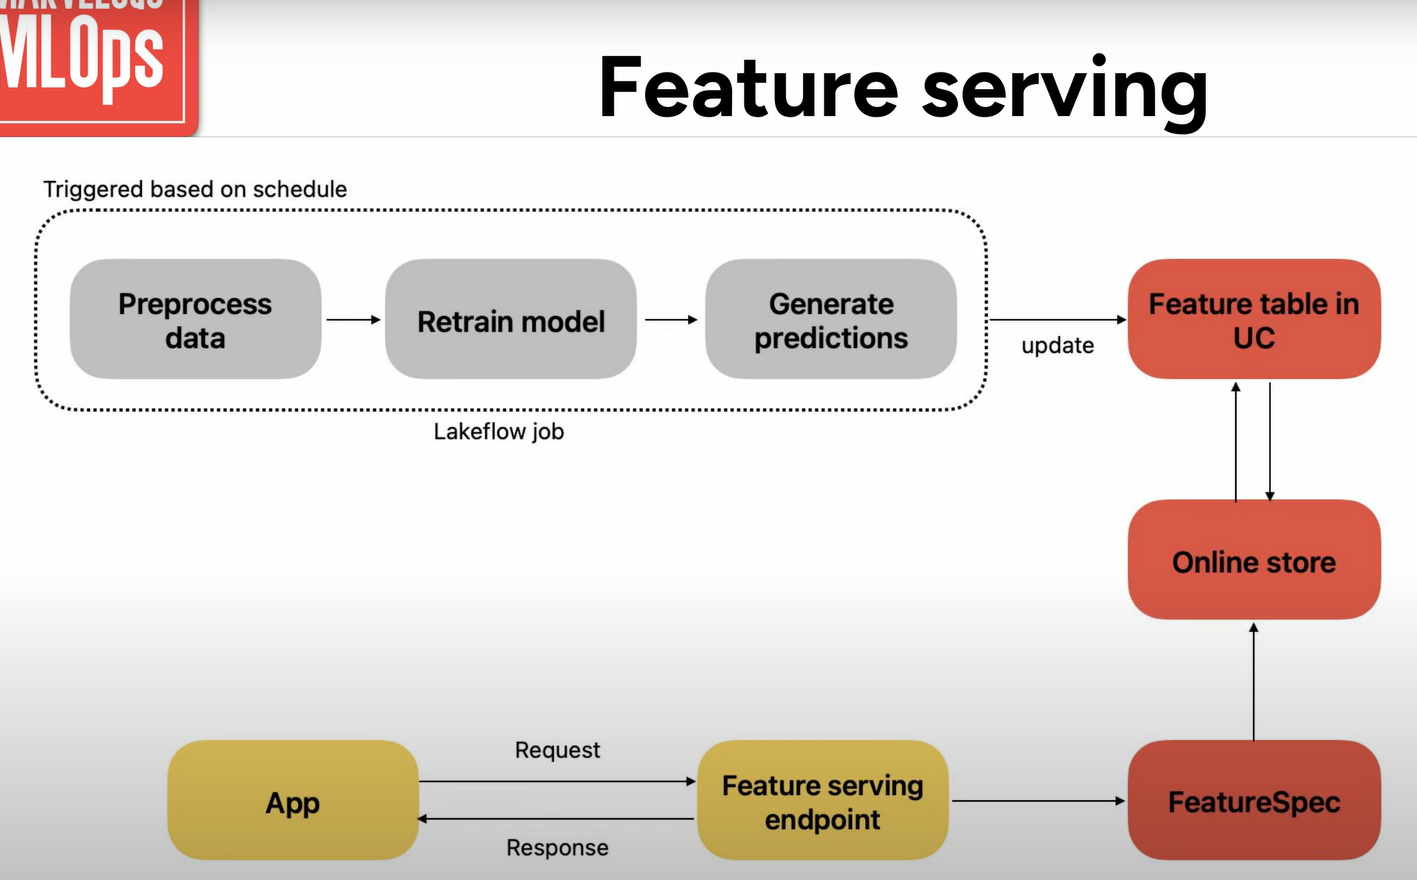

In [1]:
from IPython.display import Image, display
import os

# Path to your image in the resources folder
image_path = os.path.join("../resources", "feature_serving.png")

# Display the image in notebook output
display(Image(filename=image_path))

# 📘 Components in **Model Serving Diagram**

---

### 1. **Lakeflow Job (top, dotted line)**  
👉 Orchestrates automatic pipelines on a schedule.  

- **Preprocess Data**  
  - Cleans/transforms raw input (Delta tables, logs, transactions, etc.).  
  - Produces final features or training-ready data.  

- **Retrain Model**  
  - Periodically (daily, weekly, or event-triggered), retrains the ML model on fresh data.  
  - For example: a churn model retrained every month as new customers arrive.  

- **Update to Registry**  
  - Once retrained, the job **logs and registers a new version** of the model inside **Unity Catalog Model Registry**.  

✅ **Implementation in Databricks**:  
Lakeflow jobs = **Databricks Workflows**. A workflow can run notebooks/pipelines to retrain → save model → register in UC.

---

### 2. **Registered Model in UC (Unity Catalog)**  
👉 The “official library shelf” for your models.  
- Holds named ML models (`fraud_detection_model`, `churn_model`).  
- Tracks **versions** (`v1`, `v2`, `v3…`).  
- Keeps lineage (“this model was trained on which features/raw data?”).  
- Allows **staging & production transitions**.  
  - Example:  
    ```
    churn_model
       v1 (archived)
       v2 (staging)
       v3 (production ✅)
    ```

✅ **Implementation in Databricks**:  
Every registered model lives under a **catalog.schema.model_name** namespace and is discoverable in the Databricks UI (`Catalog → Models`).  

---

### 3. **Model Serving Endpoint**  
👉 REST API endpoint that applications can call ONLINE for predictions.  

- Deployed straight from Unity Catalog.  
- Connects to a specific version or alias, e.g.:  
  - `models:/mlops_dev.marvel_characters.churn_model@production`  
- An app can send a request (e.g. customer features), and the endpoint loads the model to return a **prediction**.  

✅ **Implementation in Databricks**:  
In the **Serving UI**, you choose `Enable Serving` for a model. Databricks handles creating a REST endpoint + scaling.  

---

### 4. **App (Downstream Consumer)**  
- This is any enterprise system, website, or service that wants predictions.  
- It doesn’t have to understand Spark, Delta, or scikit‑learn! It just calls a REST API.  
- Flow is standard:  

```
Request ➝ Model Serving Endpoint ➝ Response (prediction)
```


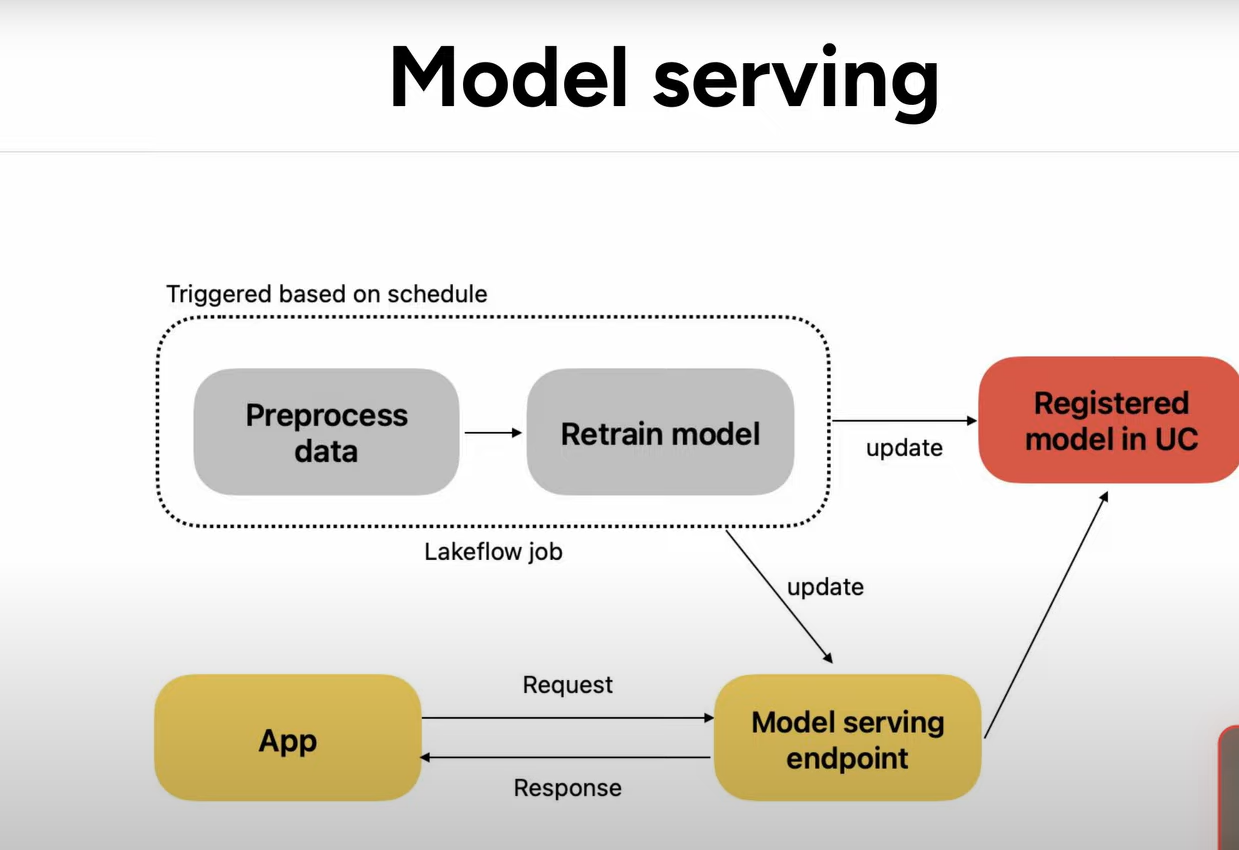

In [4]:
from IPython.display import Image, display
import os

# Path to your image in the resources folder
image_path = os.path.join("../resources", "model_serving.png")

# Display the image in notebook output
display(Image(filename=image_path))

# 📘 Model Serving With The Feature Lookup

---

### 1. **Preprocess Data (top-left, Lakeflow job)**
- This is your **feature engineering pipeline**.  
- It computes features (aggregations, rolling windows, encodings).  
- Example:  
  - `"transactions_last_30d"`, `"avg_balance_last_7d"`, `"is_premium_customer"`.  

✅ **Where it lives in Databricks:**  
- Runs as a scheduled Databricks Workflow (Lakeflow job).  
- Writes features into a **Feature Table in Unity Catalog**.  

---

### 2. **Feature Table in UC**
- Centralized **repository of features** stored in Delta/UC.  
- Provides version history (“time-travel”) and governance (lineage).  
- Example schema:
  ```
  customer_id | transactions_last_30d | avg_balance_last_7d | is_premium
  ```
  
✅ **In Databricks:**  
- “Feature Store” is implemented as UC tables.  
- Data scientists use these features for model training.  

---

### 3. **Retrain Model (Lakeflow job)**
- Periodically retrains the ML model using **Feature Store tables**.  
- Ensures model stays up-to-date as customer behavior/data changes.  

✅ Updates:  
- New model version → gets **registered in Unity Catalog** (Model Registry).  
- Registry manages versions: v1, v2, v3, etc.

---

### 4. **Registered Model in UC (Model Registry)**
- Stores the trained ML models with governance, tracking, and versioning.  
- Each new training run updates the registry with a new version.  
- Example:
  ```
  churn_model
     v1 (archived)
     v2 (staging)
     v3 (production ✅)
  ```

---

### 5. **Online Store**
- A **low-latency cache layer** that holds the latest feature values for **real-time lookup**.  
- Why? Because at inference time, the app needs **fast features** — you cannot afford to query a giant Delta table.  
- Example:  
  Given customer_id=123 → return `{transactions_last_30d: 42, avg_balance_last_7d: 3500}` in milliseconds.

✅ In Databricks:  
- The Online Store is automatically managed when feature tables are synced for serving.

---

### 6. **Model Serving Endpoint (REST API)**
- This is the **production endpoint** that apps call.  
- What makes it powerful:  
  - It can **query the Feature Store (Online Store)** for you automatically using the FeatureSpec configured at model registration.  
  - So your app **doesn’t need to compute or pass features**.  
  - App can just pass keys (e.g., `customer_id`).  

✅ Example request:
```json
{ "customer_id": "123" }
```
Internally the serving endpoint:
- Looks up features for 123 from Online Store.  
- Passes them to the model.  
- Returns prediction.

✅ Example response:
```json
{ "churn_probability": 0.27 }
```

---

### 7. **App**
- The external system/client (e.g., fraud service, churn prediction microservice).  
- Calls the model endpoint with just **entity identifiers**.  
- Receives back_predictions via API.  

---

# 🔄 Full Flow (End-to-End)

1. **Feature Engineering** (Lakeflow job):
   - Runs daily/hourly.  
   - Writes feature values into **Feature Table in UC**.  

2. **Sync to Online Store**:
   - Same features are synced/cached for fast lookups.  

3. **Model Retraining** (Lakeflow job):
   - Uses Feature Tables as input.  
   - Produces a new registered model (UC → version 2, version 3, etc.).  

4. **Model Serving Endpoint**:
   - Bound to a UC registered model version (e.g., `production`).  
   - Endpoint knows which FeatureSpec (features) are required.  

5. **App**:
   - Calls the endpoint with entity ID (e.g., `customer_id`).  
   - Endpoint fetches features from Online Store, applies the model, and returns a prediction → all transparently.  


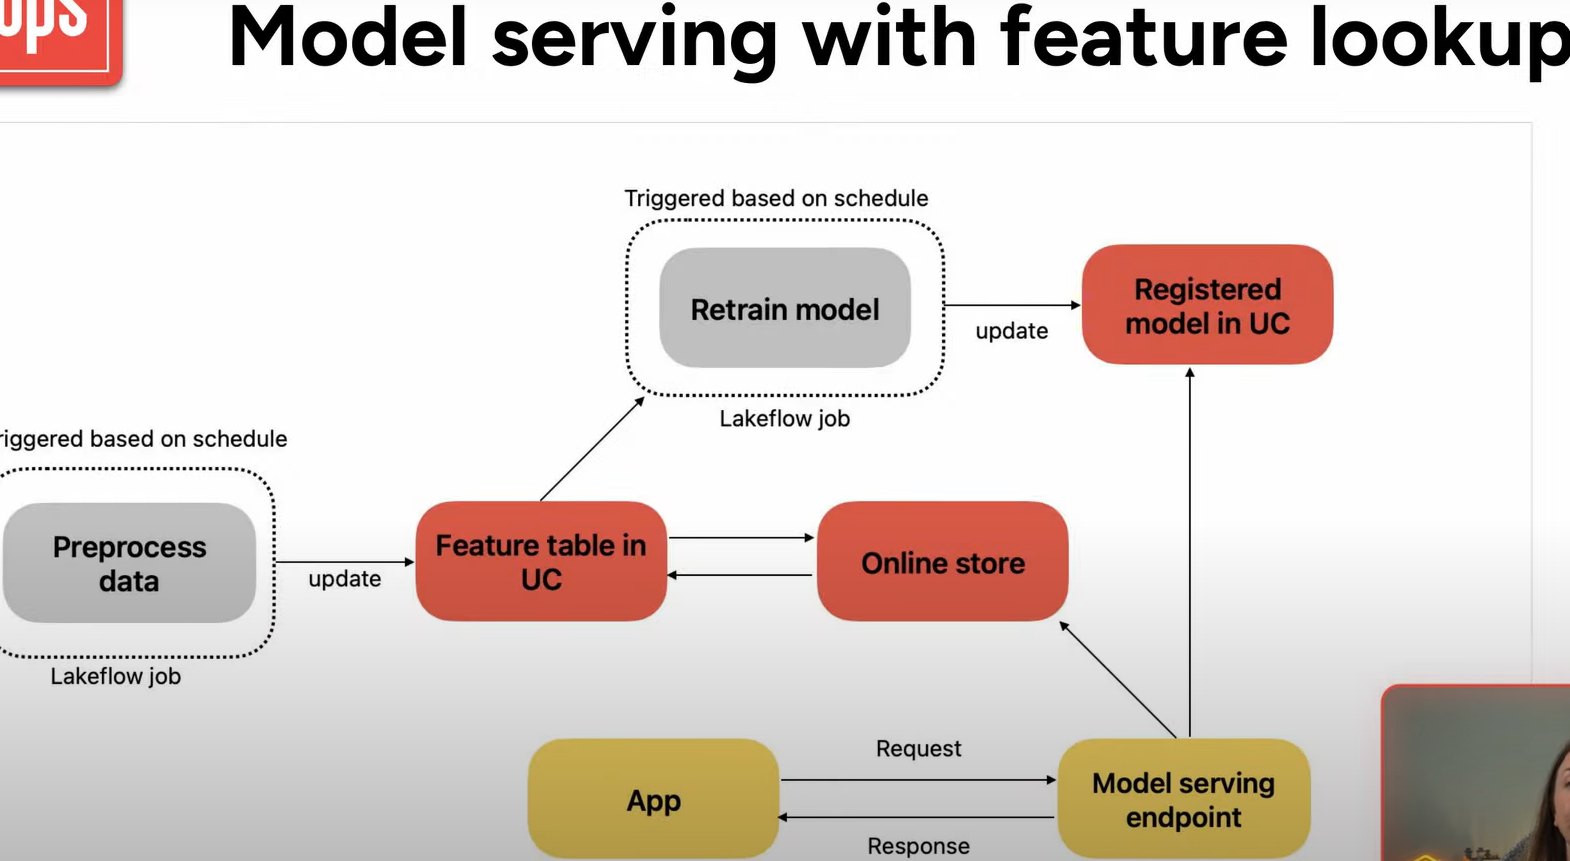

In [5]:
from IPython.display import Image, display
import os

# Path to your image in the resources folder
image_path = os.path.join("../resources", "model_serving_feature_lookup.png")

# Display the image in notebook output
display(Image(filename=image_path))

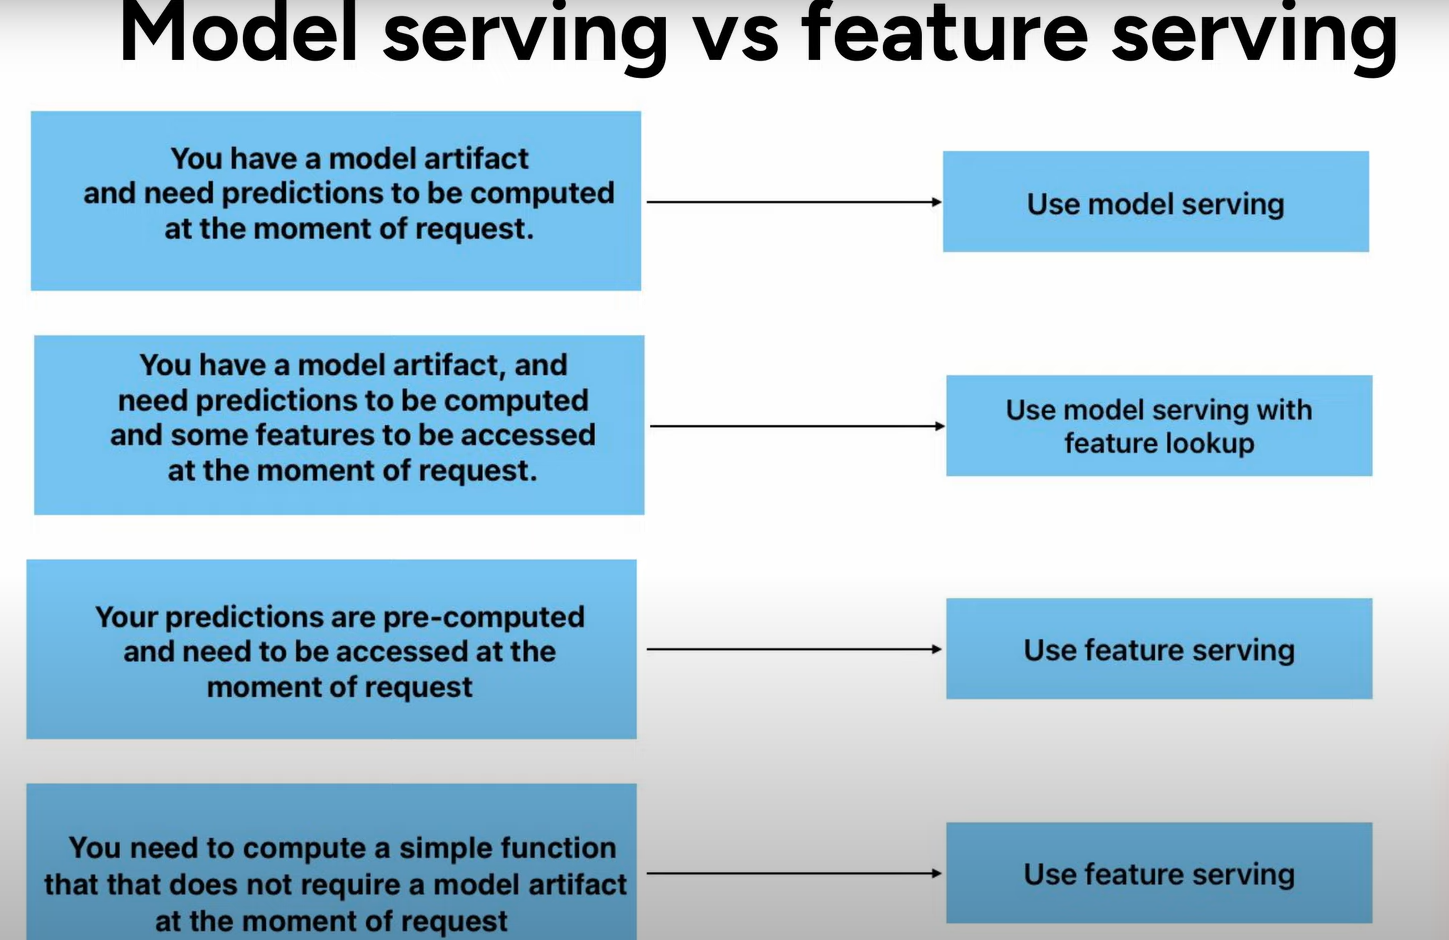

In [6]:
from IPython.display import Image, display
import os

# Path to your image in the resources folder
image_path = os.path.join("../resources", "whentouse.png")

# Display the image in notebook output
display(Image(filename=image_path))

# 1. The Core Concepts of the Compute Unit Explained

#### **Compute Unit**
Think of a **Compute Unit** as a single, dedicated worker or a single lane at a toll booth.
* As the slide says, **"Each unit can process one request at a time."** This is the most important rule. If you have 10 requests that arrive at the exact same moment, you will need 10 Compute Units to handle them without forcing any to wait in a queue.

#### **QPS (Queries Per Second)**
This is a measure of your traffic. It's the average number of prediction requests that are hitting your model's API endpoint every second.

#### **Model Processing Time (MPT)**
This is the amount of time it takes for a single Compute Unit to process one request. It's the latency of your model itself. For example, if your model takes 20 milliseconds to run, your MPT is 0.02 seconds.

---

### 2. How Databricks Scales and Allocates Units

This is the central question you asked, and the slide's formula explains it perfectly. Databricks uses a simple but powerful logic for autoscaling.

**The Formula:** `Number of required units = QPS * MPT`

Let's walk through the example on the slide to understand this intuitively:

* **Your Traffic (QPS):** You are receiving **1000 requests every second**.
* **Your Model's Speed (MPT):** Each request takes **0.02 seconds** to process.

If you multiply these, `1000 requests/sec * 0.02 sec/request = 20`, you get **20 required units**.

**Why does this work?**
Imagine you are the manager of the toll plaza. You have 1000 cars arriving every second, and it takes each car 0.02 seconds to pass through a single toll booth. To prevent a traffic jam, you need enough booths open simultaneously to handle all the cars that arrive during that 0.02-second window. The formula tells you that you need exactly **20 toll booths (Compute Units)** open at all times to handle this constant flow of traffic.

#### **How it Handles Multiple Requests:**

1.  **Request Arrival:** Let's say 20 requests arrive at your endpoint at the exact same time.
2.  **Autoscaling Trigger:** The Databricks autoscaler sees that it needs to handle 20 *concurrent* requests.
3.  **Unit Allocation:** Since each unit can only handle one request at a time, the system instantly provisions and allocates **20 Compute Units** to process these requests in parallel.
4.  **Scaling Down:** A few moments later, if the traffic drops to only 5 concurrent requests, the system will automatically scale down, de-allocating the 15 unused units to save costs. If traffic stops, it will scale down to zero.

The key insight from your slide is that scaling is based on **concurrency (the number of required units)**, not how "busy" each unit is. Even if your model only uses 5% of a unit's CPU, if 20 requests come in at once, Databricks will still spin up 20 units.


### 3. The Maximum Performance Limit

The last line on the slide explains how to calculate the theoretical maximum QPS for your endpoint. Databricks has a platform limit on the number of concurrent units an endpoint can have (in this example, it's `512`).

* **Calculation:** `Maximum QPS = (Max Units) / (Model Processing Time)`
* **Example:** `512 / 0.02s = 25,600 QPS`.
* **Meaning:** With a model that takes 20ms to run, the absolute maximum traffic your endpoint can handle under the platform's limit is 25,600 queries per second. If your model was slower (e.g., MPT = 1 second), your maximum QPS would be much lower (512 / 1 = 512 QPS).